In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm 
from iminuit import Minuit
from iminuit.cost import LeastSquares
import pandas as pd
import sympy as sp
from sympy import symbols, diff, lambdify, solve 
from numpy.linalg import inv
from scipy.integrate import quad
r = np.random
plt.rcParams['figure.figsize'] = [10, 10]


# 1

## 1.1

In [2]:
print(1-(1-1/6)**4)
print(1-(1-1/36)**24)

0.5177469135802468
0.4914038761309034


In [3]:
prob = []

for i in range(10000):
    val = np.random.choice([1,2,3,4,5,6],size = 24)*np.random.choice([1,2,3,4,5,6],size = 24)
    if max(val) == 36:
        prob.append(1)
    else:
        prob.append(0)
print(np.mean(prob),np.std(prob)/np.sqrt(len(prob)))


0.4848 0.004997689065958386


## 1.2

Follows poisson

In [4]:
avg = 18.9
std = np.sqrt(avg)
std = (42-avg)/std
print(std, 'pretty significant')


5.313504806936128 pretty significant


# 1.3

The percentage of danish ladies over 185cm tall is 0.219%
 The average height for ladies in the top 20% is 1.76m


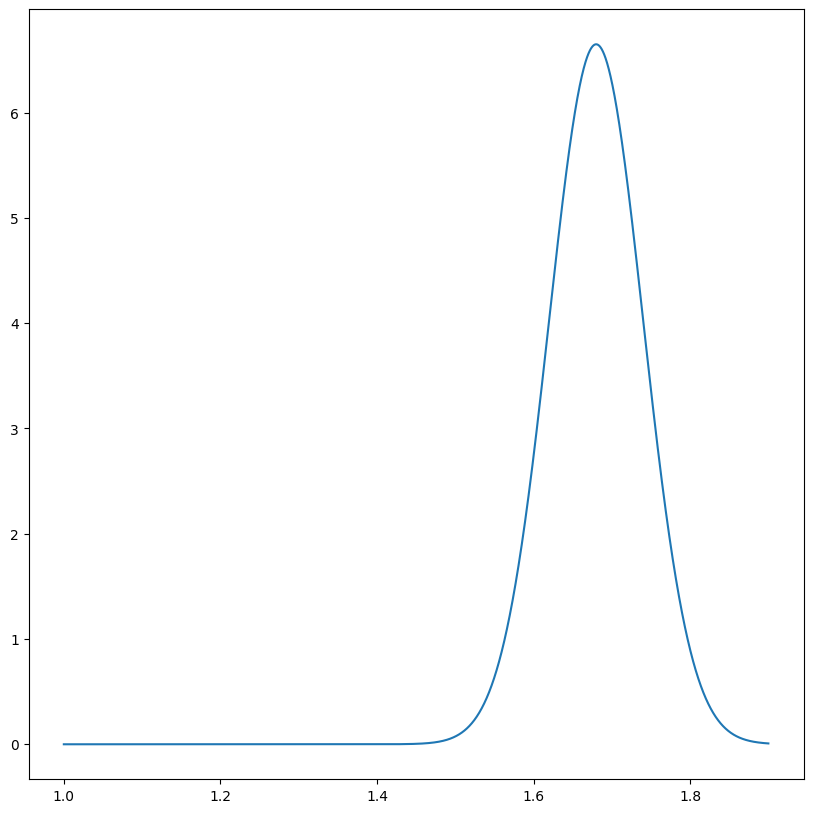

In [5]:
def gauss(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*(x-mu)**2/sigma**2)
x = np.linspace(1,1.9,4000)
y = gauss(x,1.68,0.06)
plt.plot(x,y)
xwidth = x[1]-x[0]
x185mask = x>1.85
over185 = np.sum(y[x185mask])*xwidth
print(f"The percentage of danish ladies over 185cm tall is {over185*100:.3f}%")
#top 80% is equal to
start80 = stats.norm.ppf(0.8,1.68,0.06)
over80mask = x>start80
over80 = np.sum(y[over80mask]*x[over80mask])
print(f" The average height for ladies in the top 20% is {over80/y[over80mask].sum():.2f}m")


# 2

# 2.1

$$I \propto L/A$$
$$\sigma_I^2 = (\sigma_L*1/A)^2+(L*\sigma_r*(2/r*A))^2$$
$$\sigma_L/\sigma_r = 2L/r$$

# 2.2

In [6]:
measurements = np.array([3.61,2.00,3.9,2.23,2.32,2.48,2.43,3.86,4.43,3.78])
stdmes = np.std(measurements)
meanmes = np.mean(measurements)
print(f"The average speed of the bullet was {meanmes:.2f}m/s with a standard deviation of {stdmes/np.sqrt(len(measurements)):.2f}m/s")

The average speed of the bullet was 3.10m/s with a standard deviation of 0.27m/s


Ophobning for at finde usikkerhed og der fås
$$\sigma_E^2 = (0.5*v^2*\sigma_m)^2 + (v*m*\sigma_v)^2$$ 

In [7]:
massbullet = 8.4*0.001
masserr = 0.5*0.001
kineticerrmass = (0.5*meanmes**2*masserr)**2
kineticerrvel = (meanmes*massbullet*stdmes/np.sqrt(len(measurements)))**2
print(kineticerrmass,kineticerrvel)
#Velocity dominates so


5.801854959616001e-06 4.838667861255784e-05


$$0.5*v*\sigma_m*1/m = \sigma_V/\sqrt(N)$$
$$N = (m/(0.5*v*\sigma_m*\sigma_V))^2$$

In [8]:
print("The amount of datapoints needed is ",(massbullet/(0.5*meanmes*masserr*stdmes))**2)

The amount of datapoints needed is  164.63088578129023


# 3

# 3.1

Normalize it, so take the integral in the range and set the probability equal to 1

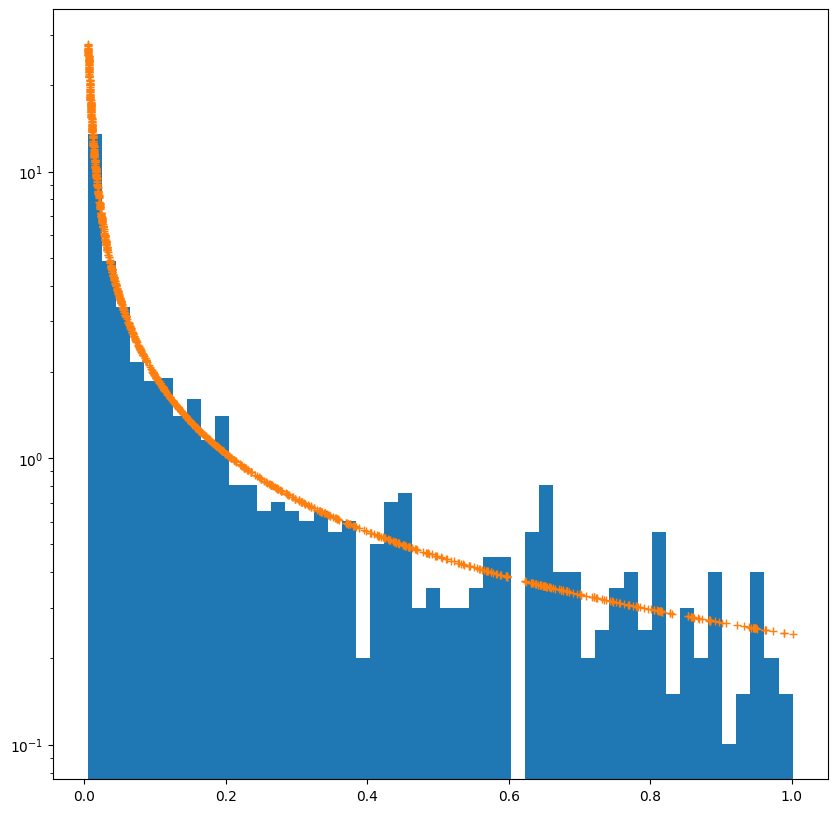

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.631e-07 (χ²/ndof = 0.0)  │              Nfcn = 128              │
│ EDM = 6.63e-07 (Goal: 0.0002)    │            time = 0.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ c    │   0.243   │   0.008   │            │            │         │         │       │
│ 1 │ a    │  -0.900   │   0.007   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        c        a │
├───┼───────────────────┤
│ c │ 5.73e-05  0.05e-3 │
│ a │  0.05e-3 4.32e-05 │
└───┴───────────────────┘

In [9]:
#from wolfram, just do it if you don't care
C = 0.243
def f(x,c,a = -0.9):
    return c*x**(a) 
def F(x,c):
    return c*10*x**0.1
#Inverse, det er simpelt. Samme i begge situationer siden integralet bruges, og integralet er ikke udefineret i x = 0. Man skal dog udregne C igen, siden nyt interval
def invF(r,c):
    return ( 0.1/(c)  *r +0.005**0.1)**(1/0.1 )
r = np.random
r.seed(42)
vals = r.uniform(0,1,1000)
x = invF(vals,C)
plt.hist(x,bins = 50,density = True)#int(np.sqrt(len(vals))))
plt.plot(x,f(x,C),'+')
plt.yscale('log')
plt.show()
chi2 = LeastSquares(x, f(x,C), 1,f)
m = Minuit(chi2, c = 1, a = 2)
m.migrad()

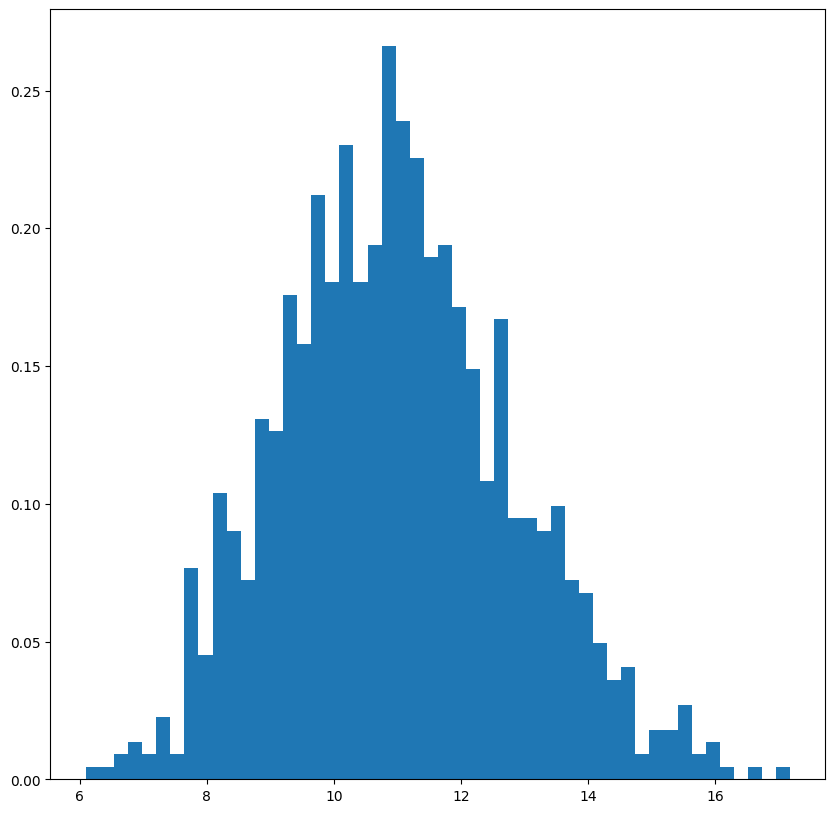

10.998229947974387 0.05720764202653592


In [10]:
tvals = []
for i in range(1000):
    vals = r.uniform(0,1,50)
    x = invF(vals,C)
    #print(sum(y))
    tvals.append(np.sum(x))
plt.hist(tvals,bins = 50,density = True)
plt.show()
print(np.mean(tvals),np.std(tvals)/np.sqrt(len(tvals)))

Faktiske gennemsnit er integralet 
$$\mu = \int^1_{0.005}*x*f(x)$$
$$\mu_t = 50*\mu = 50*0.22 = 11.019$$
so within one standard deviation

# 4.1

In [37]:
filename = "data_FisherSyndrome.txt"
    
# Load time and position, set starting time to 0, and assign uncertainty:
status,_,A,B,C = np.loadtxt(filename, unpack=True)
healthymask = status == 0
sickmask = status == 1
Ahealthy = A[healthymask]
Bhealthy = B[healthymask]
Chealthy = C[healthymask]
Asick = A[sickmask]
Bsick = B[sickmask]
Csick = C[sickmask]

[1. 1. 1. ... 0. 0. 0.]


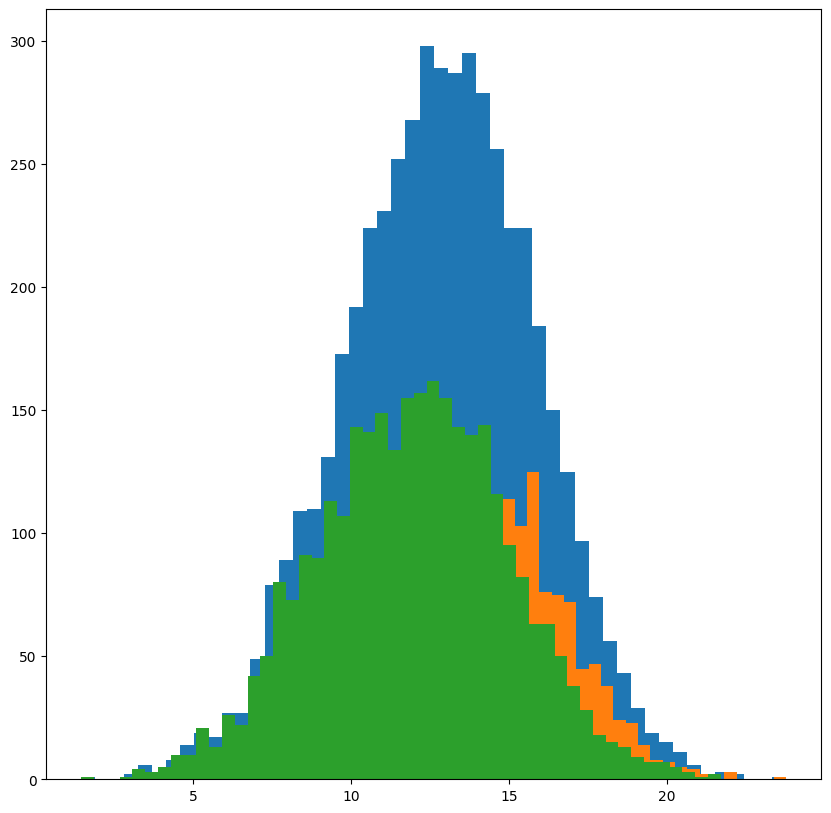

In [35]:
plt.hist(A,bins = 50)
plt.hist(Asick,bins = 50)
plt.hist(Ahealthy,bins = 50)
plt.show()
#appears to be gaussian, check via gaussian fit and comment on p value

In [13]:
def lincorr(x,y):
    return np.corrcoef(x,y)[0,1]
print("The linear correlation is ",lincorr(Bsick,Csick))


The linear correlation is  -0.3882711452946667


In [14]:
HealthyData = np.array([np.mean(Ahealthy),np.mean(Bhealthy),np.mean(Chealthy)]) 
Sickdata = np.array([np.mean(Asick),np.mean(Bsick),np.mean(Csick)]) 
cov_Sig = np.cov((Ahealthy,Bhealthy,Chealthy)) 
cov_Bg = np.cov((Asick,Bsick,Csick)) 
cov_sum = cov_Sig + cov_Bg
cov_sum_inv = inv(cov_sum)
cov_sum_inv
wf = cov_sum_inv.dot(HealthyData-Sickdata) 
print(HealthyData-Sickdata)
fisher_healthy =  np.array([Ahealthy,Bhealthy,Chealthy]).T.dot(wf)
fisher_sick = np.array([Asick,Bsick,Csick]).T.dot(wf)


[-2.08167223  9.7131244   0.84252813]


The separation is  3.236218556943747 corresponding to 3.24 sigma


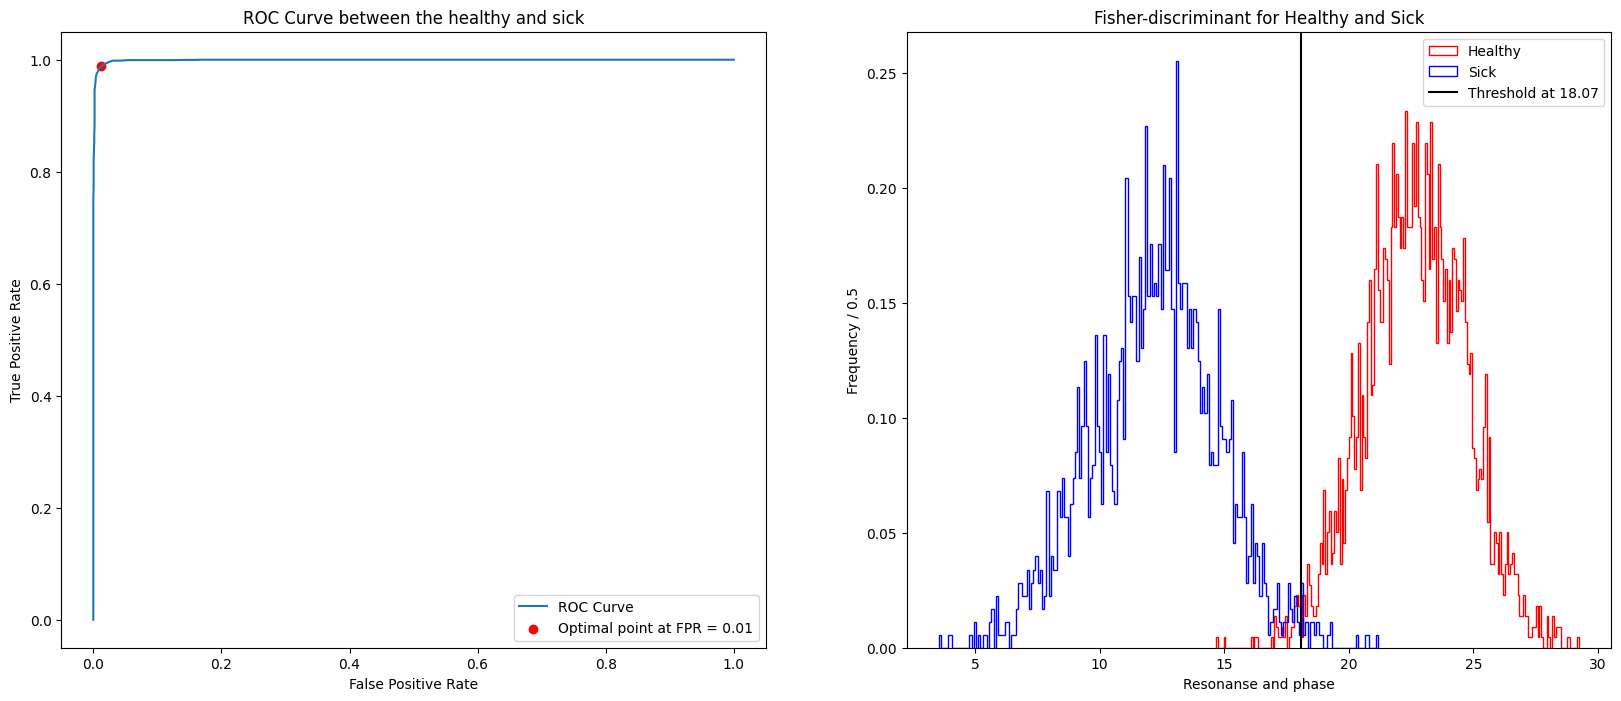

In [15]:
def calc_ROC(hist1, hist2) :

    # First we extract the entries (y values) and the edges of the histograms:
    # Note how the "_" is simply used for the rest of what e.g. "hist1" returns (not really of our interest)
    y_sig, x_sig_edges, _ = hist1 
    y_bkg, x_bkg_edges, _ = hist2
    plt.close()
    # Check that the two histograms have the same x edges:
    if np.array_equal(x_sig_edges, x_bkg_edges) :
        
        # Extract the center positions (x values) of the bins (both signal or background works - equal binning)
        x_centers = 0.5*(x_sig_edges[1:] + x_sig_edges[:-1])
        
        # Calculate the integral (sum) of the signal and background:
        integral_sig = y_sig.sum()
        integral_bkg = y_bkg.sum()
    
        # Initialize empty arrays for the True Positive Rate (TPR) and the False Positive Rate (FPR):
        TPR = np.zeros_like(y_sig) # True positive rate (sensitivity)
        FPR = np.zeros_like(y_sig) # False positive rate ()
        
        # Loop over all bins (x_centers) of the histograms and calculate TN, FP, FN, TP, FPR, and TPR for each bin:
        for i, x in enumerate(x_centers): 
            
            # The cut mask
            cut = (x_centers < x)
            
            # True positive
            TP = np.sum(y_sig[~cut]) / integral_sig    # True positives
            FN = np.sum(y_sig[cut]) / integral_sig     # False negatives
            TPR[i] = TP / (TP + FN)                    # True positive rate
            
            # True negative
            TN = np.sum(y_bkg[cut]) / integral_bkg      # True negatives (background)
            FP = np.sum(y_bkg[~cut]) / integral_bkg     # False positives
            FPR[i] = FP / (FP + TN)                        # False positive rate            

        optimal_point = np.argmin(np.sqrt(FPR**2+(1-TPR)**2)) #Closest to the top left corner, maximising TPR and minimising FPR

        optimal_threshold = x_centers[optimal_point]

        return FPR, TPR,optimal_point,optimal_threshold
    
    else:
        AssertionError("Signal and Background histograms have different bins and/or ranges")
FPR,TPR,optpoint,Threshold = calc_ROC(plt.hist(fisher_healthy, 200, (0, 30), density = True) , plt.hist(fisher_sick, 200, (0, 30), density = True))
fig,ax = plt.subplots(1,2,figsize=(20,8))

ax[0].plot(FPR, TPR, label="ROC Curve")
ax[0].scatter(FPR[optpoint], TPR[optpoint], color='red', label=f'Optimal point at FPR = {FPR[optpoint]:.2f}')
ax[0].set(xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve between the healthy and sick")
ax[0].legend()
ax[1].hist(fisher_healthy, 200, density = True,histtype='step', color='red', label='Healthy')
ax[1].hist(fisher_sick, 200,  density = True,histtype='step', color='blue', label='Sick')
ax[1].axvline(Threshold, color='black',label = f'Threshold at {Threshold:.2f}')
ax[1].legend()
ax[1].set(xlabel='Resonanse and phase', ylabel='Frequency / 0.5', title='Fisher-discriminant for Healthy and Sick')
fig.tight_layout
fig
def calc_separation(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    std_x = np.std(x, ddof=1)
    std_y = np.std(y, ddof=1)
    d = np.abs((mean_x - mean_y)) / np.sqrt(std_x**2 + std_y**2)
    
    return d
print("The separation is ",calc_separation(fisher_healthy,fisher_sick),"corresponding to 3.24 sigma")

In [16]:
control = np.array([A, B,C]).T 

fischer_control = control.dot(wf)
sickmask = fischer_control  > Threshold
MaskedA = A[~sickmask]
MaskedB = B[~sickmask]
MaskedC = C[~sickmask] 

common_A_sick = np.intersect1d(MaskedA, Asick)  # Entries in MaskedA that are also in Asick
common_A_healthy = np.intersect1d(MaskedA, Ahealthy)  # Entries in MaskedA that are also in Ahealthy

common_B_sick = np.intersect1d(MaskedB, Bsick)  # Entries in MaskedB that are also in Bsick
common_B_healthy = np.intersect1d(MaskedB, Bhealthy)  # Entries in MaskedB that are also in Bhealthy

common_C_sick = np.intersect1d(MaskedC, Csick)  # Entries in MaskedC that are also in Csick
common_C_healthy = np.intersect1d(MaskedC, Chealthy)  # Entries in MaskedC that are also in Chealthy

# Calculate the number of healthy and sick misclassified:
AlenSick = 2000 - len(common_A_sick)  # Healthy misclassified as sick
BlenSick = 2000 - len(common_B_sick)  # Healthy misclassified as sick
ClenSick = 2000 - len(common_C_sick)  # Healthy misclassified as sick

Alenhealthy = len(common_A_healthy)  # Sick misclassified as healthy
Blenhealthy = len(common_B_healthy)  # Sick misclassified as healthy
Clenhealthy = len(common_C_healthy)  # Sick misclassified as healthy

def errorrate(x, y, total_healthy=3000, total_ill=2000):
    alpha = x / total_healthy  # Type I error: healthy misclassified as sick
    beta = y / total_ill  # Type II error: sick misclassified as healthy
    print(f"Type I Error (α): {alpha}")
    print(f"Type II Error (β): {beta}")

# Call the error rate function for each variable (A, B, C)
print("For variable A:")
errorrate(Alenhealthy, AlenSick)

print("\nFor variable B:")
errorrate(Blenhealthy, BlenSick)

print("\nFor variable C:")
errorrate(Clenhealthy, ClenSick)


For variable A:
Type I Error (α): 0.029666666666666668
Type II Error (β): 0.021

For variable B:
Type I Error (α): 0.018
Type II Error (β): 0.014

For variable C:
Type I Error (α): 0.03933333333333333
Type II Error (β): 0.077


# 5

# 5.1

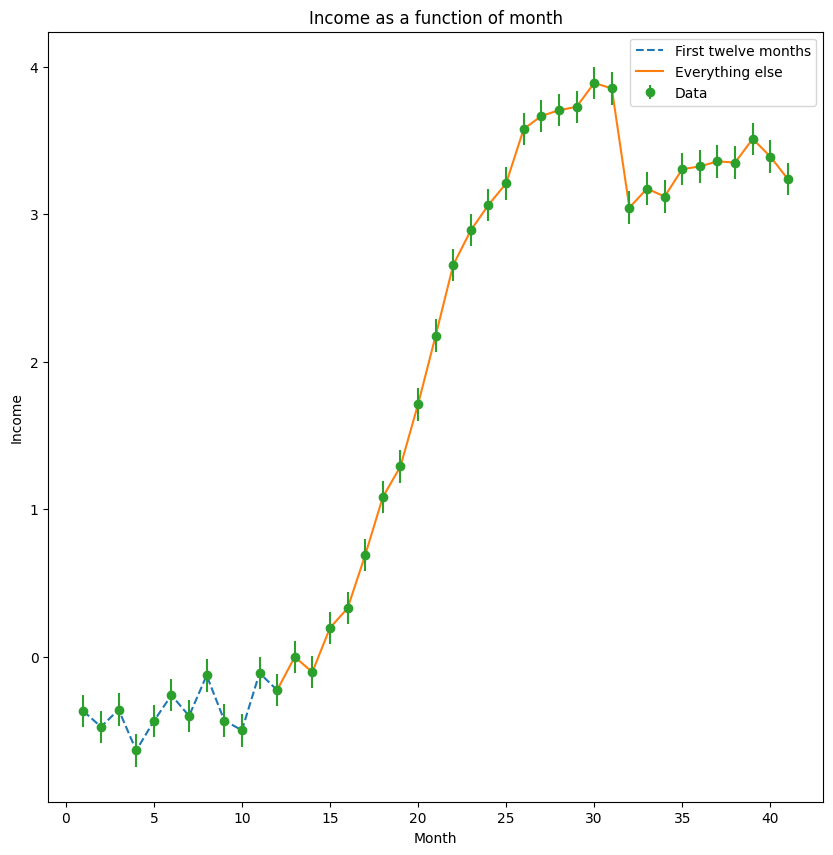

Chi-Square Statistic: 11985.30
P-Value: 0.0000


In [17]:
filename = "data_LukeLightningLights.txt"
month,_,income,err = np.loadtxt(filename, unpack=True)
plt.plot(month[:12],income[:12],'--', label = 'First twelve months')
plt.plot(month[11:],income[11:], label = 'Everything else')
plt.xlabel('Month')
plt.ylabel('Income')
plt.errorbar(month,income,yerr = err,fmt = 'o',label = 'Data')
plt.title('Income as a function of month')
plt.legend()
plt.show()
sample_variance = np.var(income, ddof=1)  # Use ddof=1 for sample variance
n = len(income)
hypothesized_variance = 0.01  # Small variance for "near constant" income

# Step 3: Calculate the Chi-Square statistic
chi_square_stat = (n - 1) * sample_variance / hypothesized_variance

# Step 4: Calculate p-value from Chi-Square distribution
p_value = 1 - stats.chi2.cdf(chi_square_stat, df=n-1)
#1 - stats.chi2.cdf(m.fval, len(month[:N])-2)
# Print results
print(f"Chi-Square Statistic: {chi_square_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
# As such, it cannot be accepted

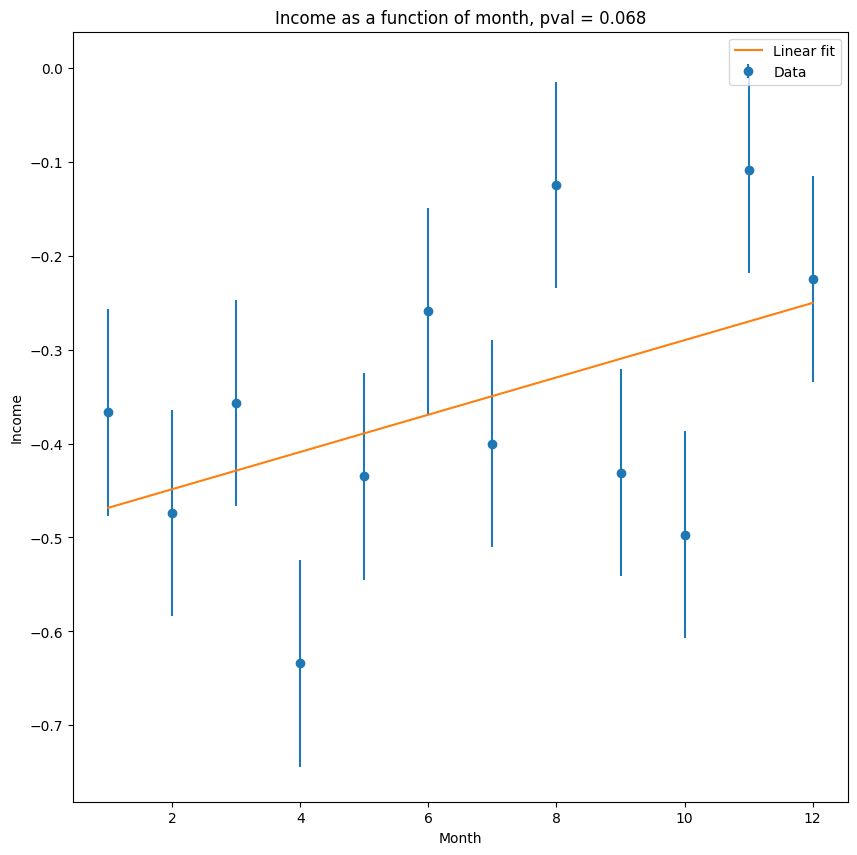

In [18]:
def linfunc(x,a,b):
    return a*x+b
N = 12
chilin = LeastSquares(month[:N],income[:N],err[:N],linfunc)
m = Minuit(chilin, a = 1, b = 1)
m.migrad()
a = m.values['a']
b = m.values['b']
pval = 1 - stats.chi2.cdf(m.fval, len(month[:N])-2)
plt.errorbar(month[:N],income[:N],yerr = err[:N],fmt = 'o',label = 'Data')
plt.plot(month[:N],linfunc(month[:N],a,b),label = 'Linear fit')
plt.xlabel('Month')
plt.ylabel('Income')
plt.title(f'Income as a function of month, pval = {pval:.3f}')
plt.legend()
plt.show()
#Pval is good, so we can use the linear fit.

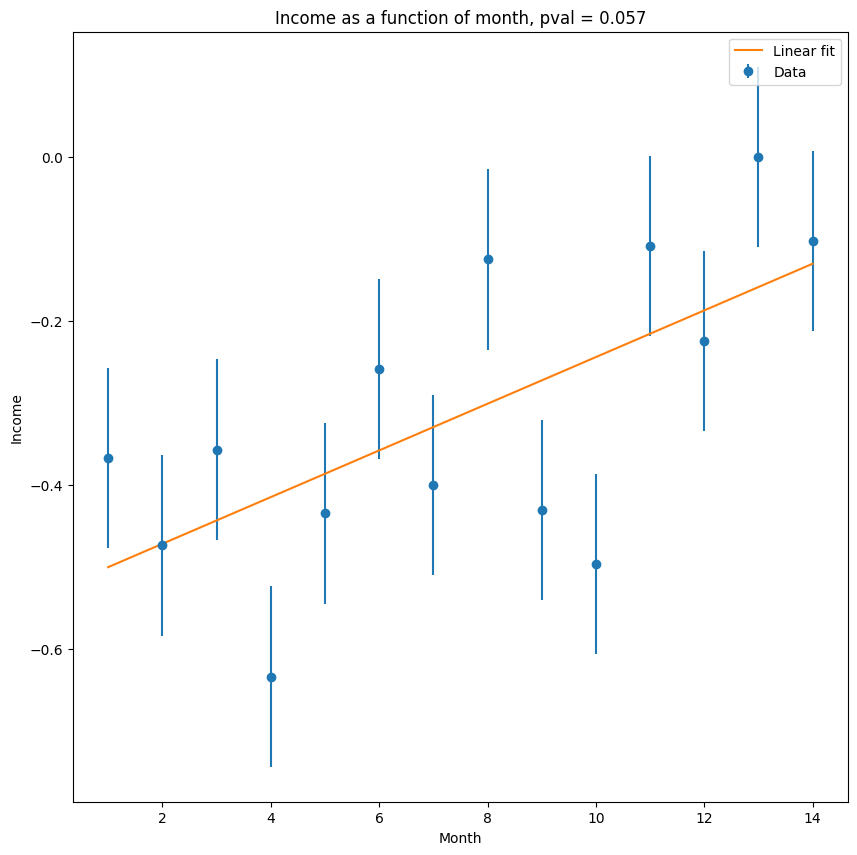

In [19]:
def linfunc(x,a,b):
    return a*x+b
N = 14
chilin = LeastSquares(month[:N],income[:N],err[:N],linfunc)
m = Minuit(chilin, a = 1, b = 1)
m.migrad()
a = m.values['a']
b = m.values['b']
pval = 1 - stats.chi2.cdf(m.fval, len(month[:N])-2)
plt.errorbar(month[:N],income[:N],yerr = err[:N],fmt = 'o',label = 'Data')
plt.plot(month[:N],linfunc(month[:N],a,b),label = 'Linear fit')
plt.xlabel('Month')
plt.ylabel('Income')
plt.title(f'Income as a function of month, pval = {pval:.3f}')
plt.legend()
plt.show()
#It can be extended to 14 months

c =  0.8320024242822294 +- 0.1014356255816537


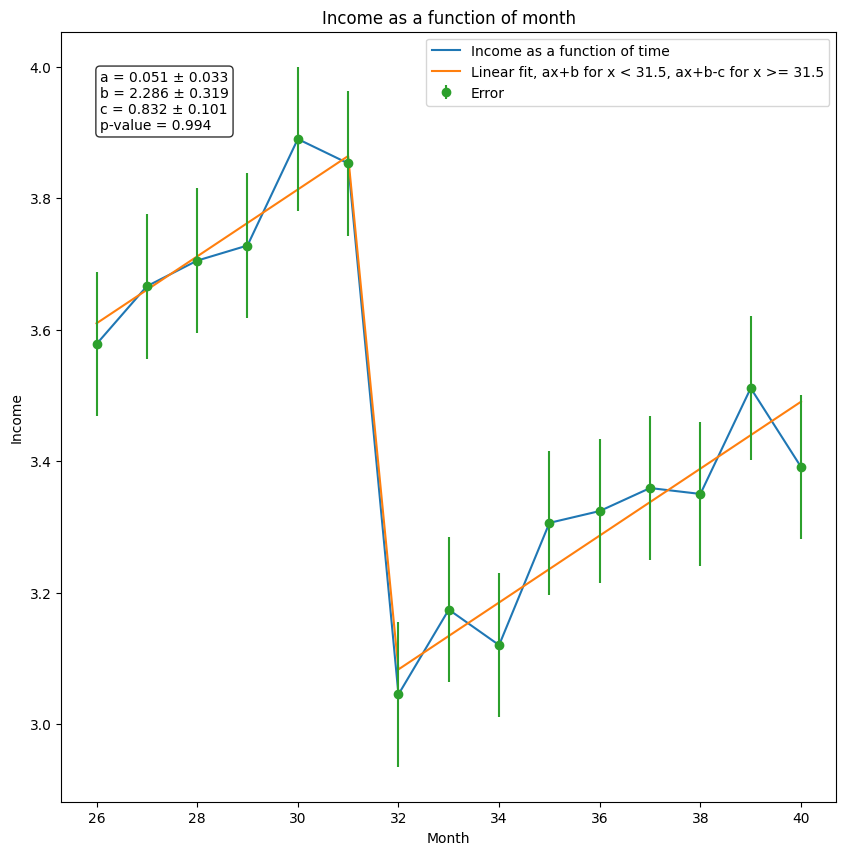

In [20]:
def func51short(x, a, b, c):
    return np.piecewise(x, 
                        [x < 31.5, x >= 31.5], 
                        [lambda x: a*x+b,  # For x < 31
                         lambda x: a*x+b-c])               # For x >= 31

N = 25
Last = 40
chilin = LeastSquares(month[N:Last],income[N:Last],err[N:Last],func51short)
m = Minuit(chilin, a = 2, b = 3.6,c = 20)
m.limits['a'] = (0.05,None)
m.migrad()
params = m.values
errors = m.errors
pval = 1 - stats.chi2.cdf(m.fval, len(month[N:Last])-3)
print("c = ",m.values[2], "+-",m.errors[2])
plt.plot(month[N:Last],income[N:Last], label = 'Income as a function of time')
plt.xlabel('Month')
plt.ylabel('Income')
plt.plot(month[N:Last],func51short(month[N:Last],*m.values),label = 'Linear fit, ax+b for x < 31.5, ax+b-c for x >= 31.5')
plt.errorbar(month[N:Last],income[N:Last],yerr = err[N:Last],fmt = 'o',label = 'Error')
plt.title('Income as a function of month')
fit_text = (f"a = {params['a']:.3f} ± {errors['a']:.3f}\n"
            f"b = {params['b']:.3f} ± {errors['b']:.3f}\n"
            f"c = {params['c']:.3f} ± {errors['c']:.3f}\n"
            f"p-value = {pval:.3f}")
plt.gca().text(0.05, 0.95, fit_text, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.legend()
plt.show()
#As such, the bump at the 31 month is around 0.832 +- 0.101
#good p val

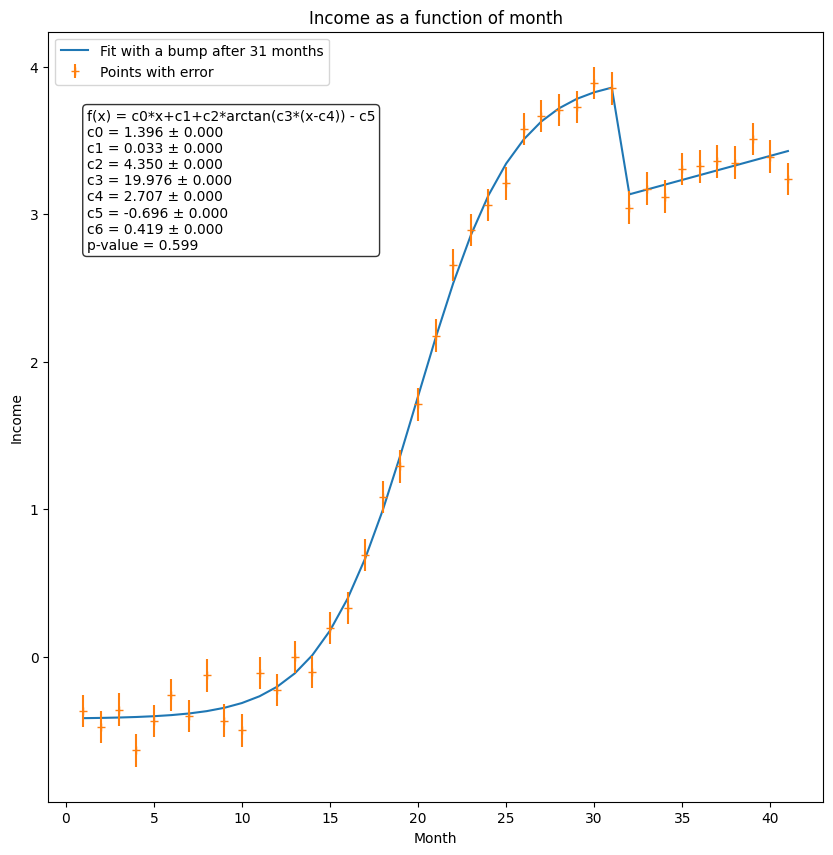

In [21]:
def func51full(x, c0, c1, c2,c3,c4,c5,c6):
    return np.piecewise(x, 
                    [x < 32, x >= 32], 
                    [lambda x:   (c2)/(1+np.exp(-(x-c3)/c4))-c6 ,  # For x < 31
                    lambda x:  c0+c1*x -c5])               # For x >= 31
chifull = LeastSquares(month,income,err,func51full)
m2 = Minuit(chifull, c0 = 0, c1 = 2,c2 = 2,c3 = 0.2,c4 = 2,c5 = 0.7,c6 = 1)
m2.migrad()
params = m2.values
errors = m2.errors
pval = 1 - stats.chi2.cdf(m2.fval, len(month)-6)
plt.xlabel('Month')
plt.ylabel('Income')
plt.plot(month,func51full(month,*m2.values),label = 'Fit with a bump after 31 months')
plt.errorbar(month,income,yerr = err,fmt = '+',label = 'Points with error')
plt.title('Income as a function of month')

fit_text = (f"f(x) = c0*x+c1+c2*arctan(c3*(x-c4)) - c5\n"
            f"c0 = {params['c0']:.3f} ± {errors['c0']:.3f}\n"
            f"c1 = {params['c1']:.3f} ± {errors['c1']:.3f}\n"
            f"c2 = {params['c2']:.3f} ± {errors['c2']:.3f}\n"
            f"c3 = {params['c3']:.3f} ± {errors['c3']:.3f}\n"
            f"c4 = {params['c4']:.3f} ± {errors['c4']:.3f}\n"
            f"c5 = {params['c5']:.3f} ± {errors['c5']:.3f}\n"
            f"c6 = {params['c6']:.3f} ± {errors['c6']:.3f}\n"
            f"p-value = {pval:.3f}")
plt.gca().text(0.05, 0.9, fit_text, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.legend()
plt.show()


# 5.2

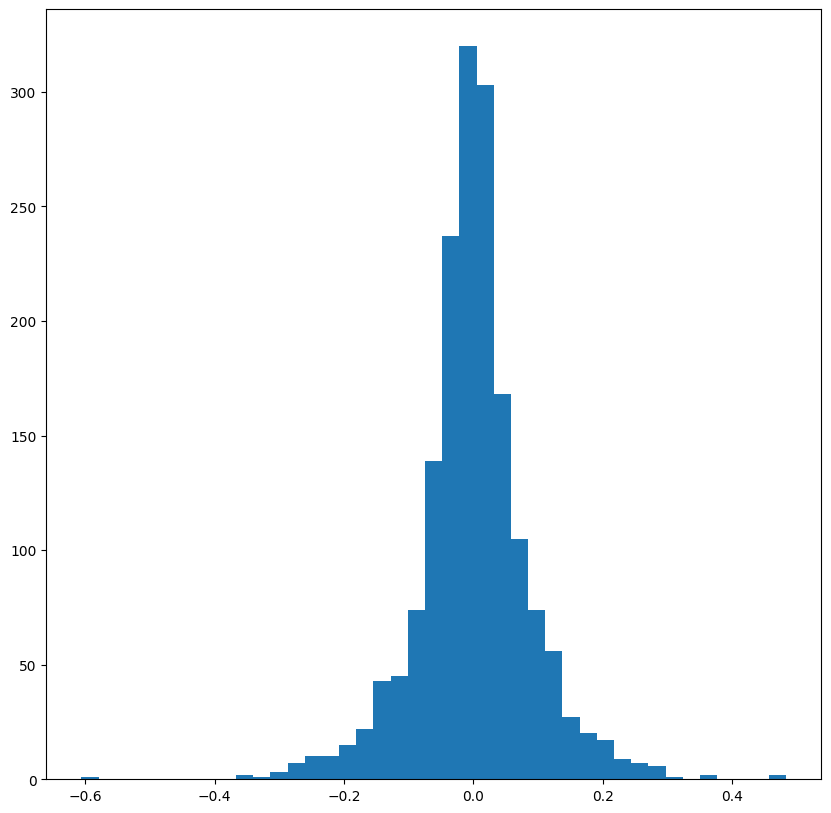

The mean is  0.00015295480880648878  and the RMSE is  0.0021152430032920395
Pretty consistent with zero


In [22]:
filename = "data_TimingResiduals.txt"
timing = np.loadtxt(filename, unpack=True)
plt.hist(timing,bins = int(np.sqrt(len(timing))))
plt.show()
std = np.std(timing)
RMSE = np.std(timing)/np.sqrt(len(timing))
mean = np.mean(timing)
print("The mean is ",np.mean(timing)," and the RMSE is ",np.std(timing)/np.sqrt(len(timing)))
print("Pretty consistent with zero")


Outliers detected: 3
Removed 3 outliers
Outliers detected: 0
Original length: 1726, Filtered length: 1723


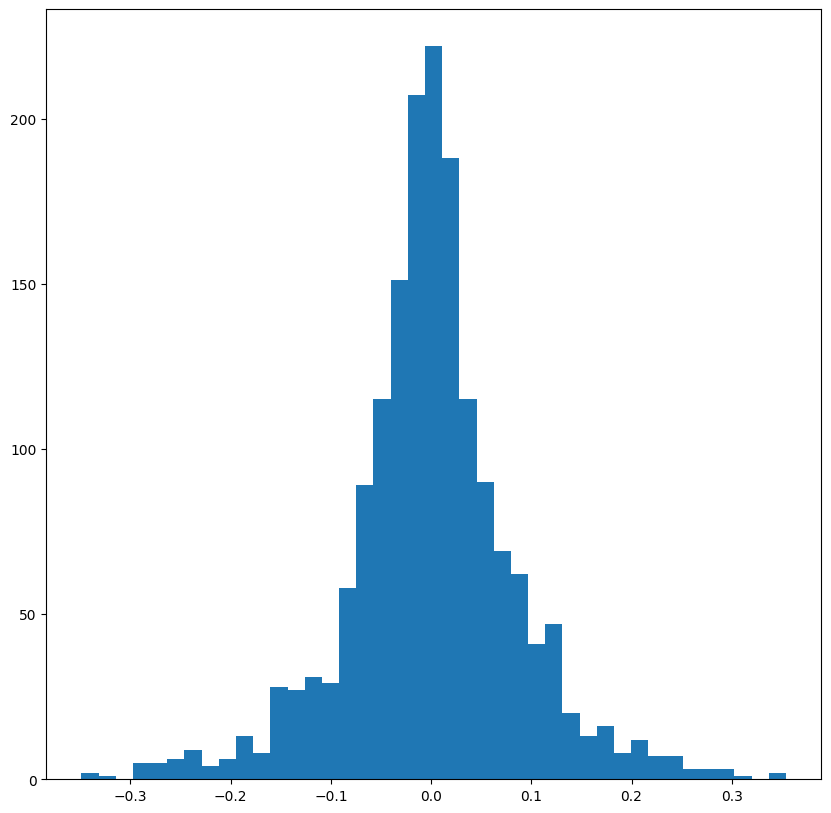

In [23]:
# Define the Chauvenet criterion function
def chauvenet_criterion(x, mean, std):
    d = np.abs(x - mean) / std  # Calculate normalized distance
    prob = 2 * stats.norm.sf(d)  # Two-tailed probability
    return prob

# Initialize variables
change = True
Timingtemp = np.copy(timing)  # Copy the timing array
meantemp = np.mean(Timingtemp)
stdtemp = np.std(Timingtemp)

# Iteratively apply the Chauvenet criterion
while change:
    change = False
    prob = chauvenet_criterion(Timingtemp, meantemp, stdtemp)  # Calculate probabilities

    mask = prob >= 0.00001  # Keep values with probabilities >= 0.5 (adjust threshold if needed)
    print(f"Outliers detected: {np.sum(~mask)}")  # Print the number of outliers
    
    if np.sum(~mask) > 0:  # Check if any outliers exist
        Timingtemp = Timingtemp[mask]  # Filter out the outliers
        stdtemp = np.std(Timingtemp)  # Recalculate standard deviation
        meantemp = np.mean(Timingtemp)  # Recalculate mean
        change = True  # Indicate that another iteration is needed
        print(f"Removed {np.sum(~mask)} outliers")

# Print final results
print(f"Original length: {len(timing)}, Filtered length: {len(Timingtemp)}")
plt.hist(Timingtemp,bins = int(np.sqrt(len(Timingtemp))))
plt.show()

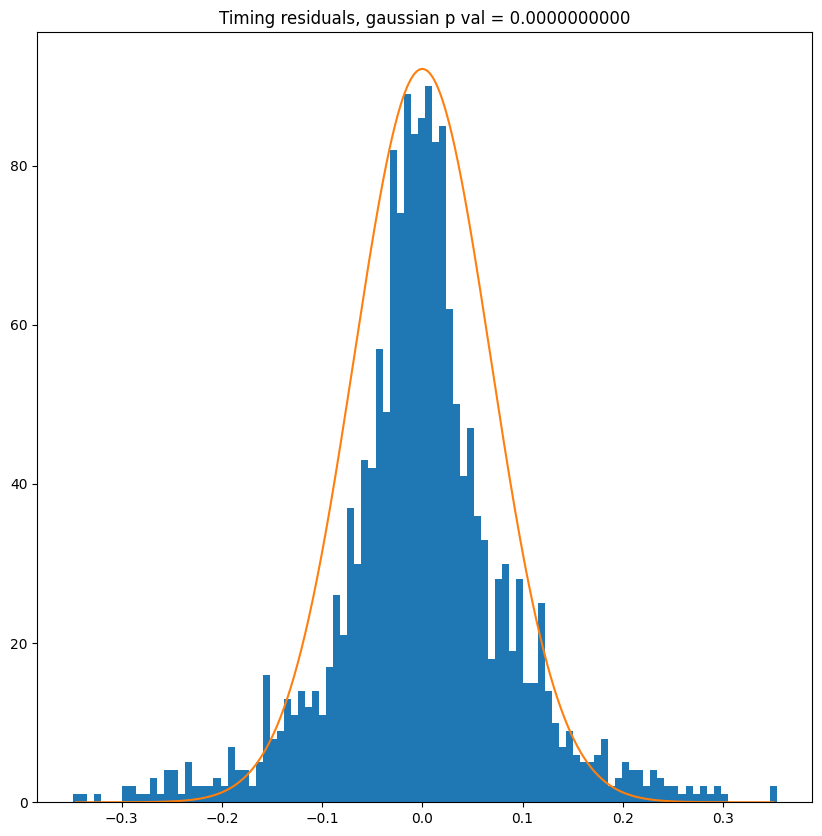

In [24]:
def gauss(x,sigma,N):
    return N/(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5*(x)**2/sigma**2)
counts, bins = np.histogram(Timingtemp,bins = 100)
bincenter = 0.5*(bins[1:]+bins[:-1])
binwdith = bins[1]-bins[0]
mask = counts > 0
counts = counts[mask]
bincenter = bincenter[mask]
chigaus = LeastSquares(bincenter,counts, np.sqrt(counts),gauss)
m = Minuit(chigaus, sigma = 1,N = binwdith*len(Timingtemp))
m.migrad()
binspace = np.linspace(min(bincenter),max(bincenter),1000)
plt.hist(Timingtemp,bins = 100)
#plt.plot(bincenter,counts,'o')
plt.plot(binspace,gauss(binspace,0.8*np.std(Timingtemp),1.3*binwdith*len(Timingtemp)))
plt.title(f'Timing residuals, gaussian p val = {1 - stats.chi2.cdf(m.fval, len(bincenter)-3):.10f}')
plt.show()
#So gauss is useless


Lets try double gaussian

0.5091375375156196


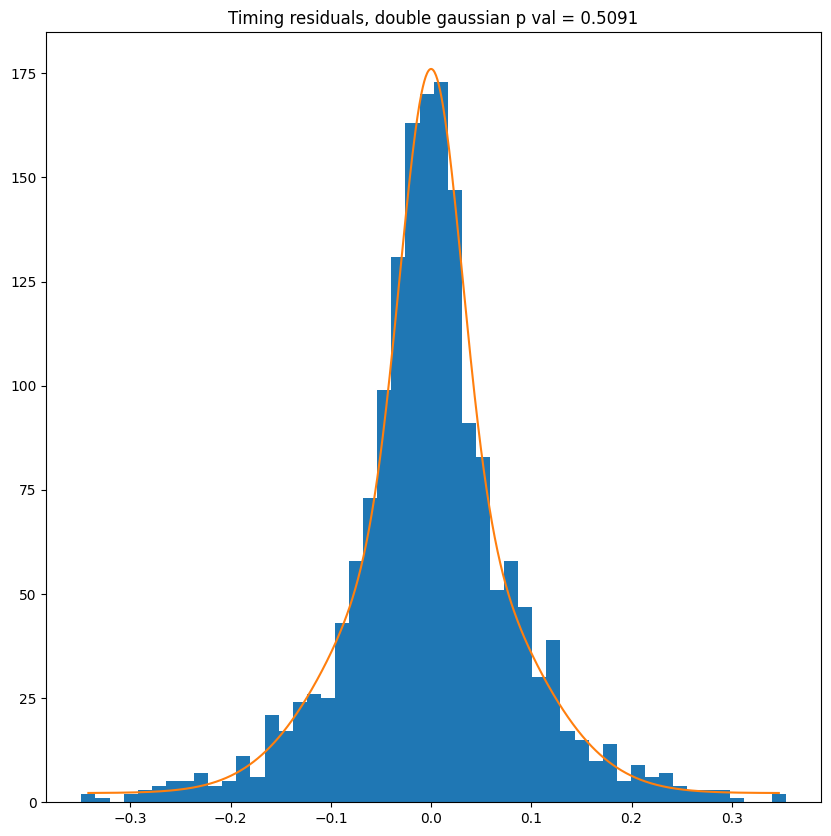

In [25]:
def doublegauss(x,sigma1,sigma2,N,f):
    gauss1 = f/(np.sqrt(2*np.pi)*sigma1)*np.exp(-0.5*(x)**2/sigma1**2)
    gauss2 = (1-f)/(np.sqrt(2*np.pi)*sigma2)*np.exp(-0.5*(x)**2/sigma2**2)+0.1
    return N*(gauss1 + gauss2)
counts, bins = np.histogram(Timingtemp,bins = 50)
bincenter = 0.5*(bins[1:]+bins[:-1])
binwdith = bins[1]-bins[0]
mask = counts > 0
counts = counts[mask]
bincenter = bincenter[mask]
chigaus = LeastSquares(bincenter,counts, np.sqrt(counts),doublegauss)
m2 = Minuit(chigaus, sigma1 = 0.2*stdtemp,N = binwdith*len(Timingtemp), sigma2 = 5*stdtemp,f = 0.5)
m2.limits['f'] = (0,1)
m2.limits['N'] = (0,None)
m2.migrad()
binspace = np.linspace(min(bincenter),max(bincenter),1000)
pval = 1 - stats.chi2.cdf(m2.fval, len(bincenter)-4)
print(pval)
plt.hist(Timingtemp,bins = 50)
plt.plot(binspace,doublegauss(binspace,*m2.values))
plt.title(f'Timing residuals, double gaussian p val = {pval:.4f}')
plt.show()


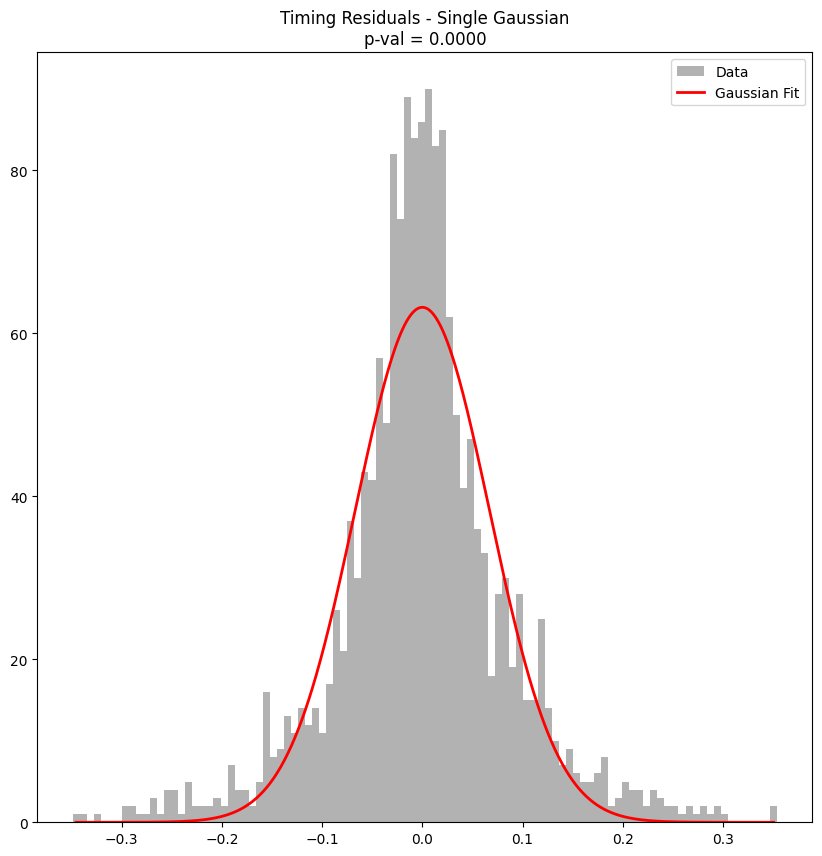

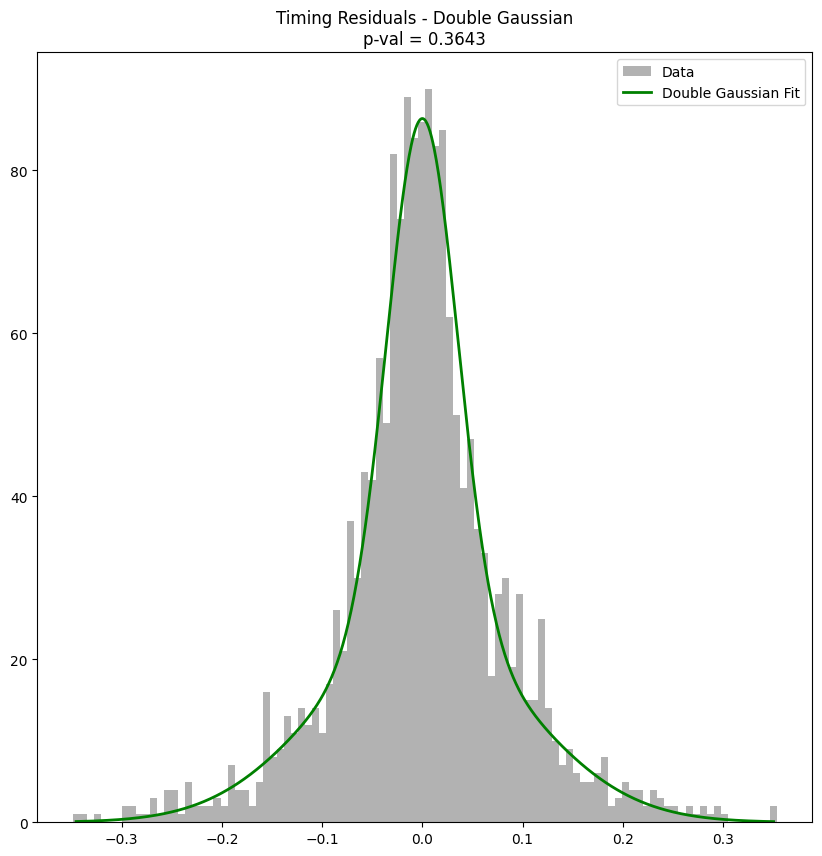

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from iminuit import Minuit
from iminuit.cost import LeastSquares

# Define Gaussian and Double Gaussian functions
def gauss(x, sigma, N):
    return N / (np.sqrt(2 * np.pi) * sigma) * np.exp(-0.5 * (x)**2 / sigma**2)

def doublegauss(x, sigma1, sigma2, N, f):
    gauss1 = f / (np.sqrt(2 * np.pi) * sigma1) * np.exp(-0.5 * (x)**2 / sigma1**2)
    gauss2 = (1 - f) / (np.sqrt(2 * np.pi) * sigma2) * np.exp(-0.5 * (x)**2 / sigma2**2)
    return N * (gauss1 + gauss2)

# Create histogram
counts, bins = np.histogram(Timingtemp, bins=100)
bincenter = 0.5 * (bins[1:] + bins[:-1])
binwidth = bins[1] - bins[0]

# Exclude bins with zero counts
mask = counts > 0
counts = counts[mask]
bincenter = bincenter[mask]
uncertainties = np.sqrt(counts)  # Poisson uncertainties

# Single Gaussian fit
chigaus = LeastSquares(bincenter, counts, uncertainties, gauss)
m = Minuit(chigaus, sigma=np.std(Timingtemp), N=10*len(Timingtemp) * binwidth)
m.limits["sigma"] = (0, None)  # Ensure sigma is positive
m.limits["N"] = (0, None)  # Ensure N is positive
m.migrad()

# Plot single Gaussian fit
binspace = np.linspace(min(bincenter), max(bincenter), 1000)
plt.hist(Timingtemp, bins=100, label="Data", alpha=0.6, color="gray")
plt.plot(binspace, gauss(binspace, *m.values), label="Gaussian Fit", color="red", linewidth=2)
plt.title(f"Timing Residuals - Single Gaussian\np-val = {1 - stats.chi2.cdf(m.fval, len(bincenter)-2):.4f}")
plt.legend()
plt.show()

# Double Gaussian fit
chigaus = LeastSquares(bincenter, counts, uncertainties, doublegauss)
m2 = Minuit(chigaus, sigma1= 1, sigma2= np.std(Timingtemp),
            N=0.02*len(Timingtemp) * binwidth, f=0.5)
m2.limits["sigma1"] = (0, None)
m2.limits["sigma2"] = (0, None)
m2.limits["N"] = (0, None)
m2.limits["f"] = (0, 1)
m2.migrad()

# Plot double Gaussian fit
plt.hist(Timingtemp, bins=100, label="Data", alpha=0.6, color="gray")
plt.plot(binspace, doublegauss(binspace, *m2.values), label="Double Gaussian Fit", color="green", linewidth=2)
plt.title(f"Timing Residuals - Double Gaussian\np-val = {1 - stats.chi2.cdf(m2.fval, len(bincenter)-4):.4f}")
plt.legend()
plt.show()
